# Heart Failure Prediction 💓
**Medical Real World Problem Statement :-**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

If you're able to make a machine learning model, then this will help in early detection and people can be saved.

You have to predict a person death event using some features:-
Age ,Gender , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time

Dataset link:- https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

**Author of this notebook :- Vikas Kumar**

# Loading and Exploring Data 📚

In [2]:
import pandas as pd  # Data manipulation or handling the structured data
import numpy as np  # Numerical operations

import seaborn as sns  # Statistical visualization
import matplotlib.pyplot as plt  # Basic plotting
%matplotlib inline


In [4]:
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
print("The shape of the data : (number_of_rows, number_of_columns) = " , data.shape)

The shape of the data : (number_of_rows, number_of_columns) =  (299, 13)


In [6]:
print("Information about the data : ")
data.info()

Information about the data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usa

In [7]:
print("Describing the data:")
data.describe() #computes stastics summaray for all numeric columns

Describing the data:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
print("No. of null values in the data: ")
data.isnull()

No. of null values in the data: 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [10]:
print("No. of null values in the data")
data.isnull().sum().sum()

No. of null values in the data


np.int64(0)

# Exploratory data analysis 📚

Additional Information to understand the code :
data["DEATH_EVENT"] == 1	, Create a mask (filter)

data["DEATH_EVENT"][mask]	 , Apply mask to column

len(...)	Count filtered values

Total No. of Living Cases: 203
Total No. of Died Cases: 96


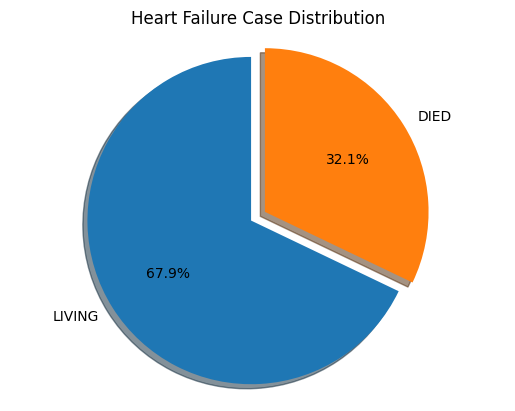

In [11]:
# 📊 Step: Analyze class distribution (target variable = DEATH_EVENT)
# Purpose: Understand how many patients lived vs died — very important for classification problems

# Count the number of patients who survived (DEATH_EVENT == 0)
# This filters the 'DEATH_EVENT' column where value is 0 (survived), and counts how many such cases exist
len_live = len(data["DEATH_EVENT"][data["DEATH_EVENT"] == 0])

# Count the number of patients who died (DEATH_EVENT == 1)
# This filters the 'DEATH_EVENT' column where value is 1 (died), and counts them
len_death = len(data["DEATH_EVENT"][data["DEATH_EVENT"] == 1])

# Store both counts in a NumPy array so we can easily use it in plotting functions like plt.pie()
arr = np.array([len_live, len_death])

# Define readable labels for each class in the pie chart
labels = ['LIVING', 'DIED']

# ✅ Print the number of patients who survived
print("Total No. of Living Cases:", len_live)

# ✅ Print the number of patients who died
print("Total No. of Died Cases:", len_death)

# 🥧 Plot a pie chart to visually compare class proportions
plt.pie(
    arr,                    # The data: [number of living, number of died]
    labels=labels,          # Labels for each slice: ['LIVING', 'DIED']
    explode=[0.1, 0],       # Offset the 'LIVING' slice to highlight it (visually pull it out)
    shadow=True,            # Add a shadow under the pie chart for better visual appeal
    autopct='%1.1f%%',      # Show percentage values with 1 decimal point (e.g., 70.2%)
    startangle=90           # Rotate the pie chart to start from the top (makes it cleaner)
)

# Set a title for the chart
plt.title("Heart Failure Case Distribution")

# Ensure the pie chart is drawn as a perfect circle, not an oval
plt.axis('equal')

# Show the plot
plt.show()

# 🧠 Inference:
# The dataset is imbalanced — more patients lived than died.
# This class imbalance can affect machine learning models and must be addressed later (e.g., via SMOTE, class weights, etc.)


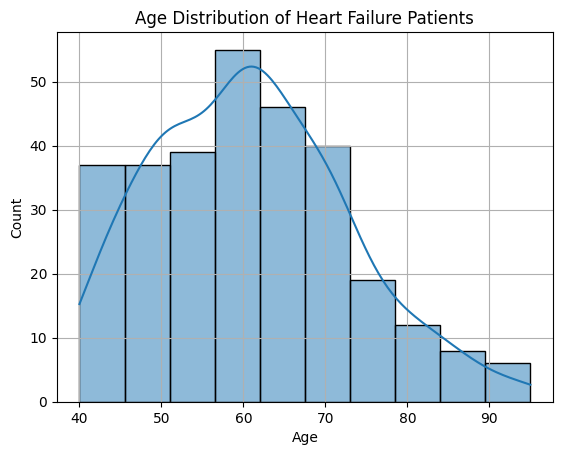

In [12]:
# 📊 Distribution plot for 'age' — helps understand how patient ages are spread

# Import seaborn and matplotlib (if not already imported)
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Plot histogram with KDE curve for the 'age' column
sns.histplot(data["age"],kde=True)

# 🖼️ Display the plot
plt.title("Age Distribution of Heart Failure Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()


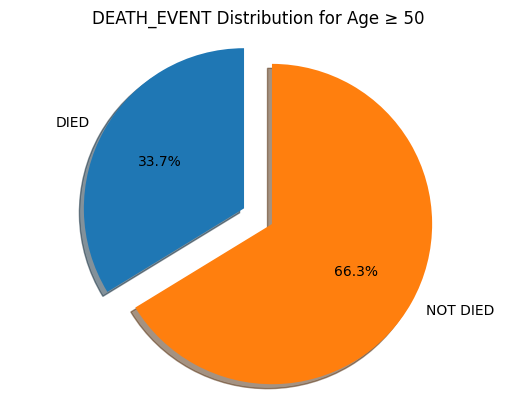

Total no. of died cases (age ≥ 50): 85
Total no. of not died cases (age ≥ 50): 167


In [13]:
# 📊 Purpose: Analyze how many patients aged 50 or above died vs survived
# This helps us understand if older patients are more at risk

# ✅ Step 1: Filter the dataset for patients aged 50 or older
# This returns a new DataFrame that only includes patients with age ≥ 50
age_50_plus = data[data["age"] >= 50]

# ✅ Step 2: From the filtered data, separate those who died and those who didn't

# Filter patients aged 50+ who died (DEATH_EVENT == 1)
age_above_50_died = age_50_plus[age_50_plus["DEATH_EVENT"] == 1]

# Filter patients aged 50+ who survived (DEATH_EVENT == 0)
age_above_50_not_died = age_50_plus[age_50_plus["DEATH_EVENT"] == 0]

# ✅ Step 3: Count the number of patients in each group

# Count of patients aged 50+ who died
len_died = len(age_above_50_died)

# Count of patients aged 50+ who survived
len_not_died = len(age_above_50_not_died)

# ✅ Step 4: Prepare data for the pie chart

# Combine both counts into a list (for pie chart)
arr1 = [len_died, len_not_died]

# Define labels for each group in the chart
labels = ['DIED', 'NOT DIED']

# ✅ Step 5: Plot the pie chart for visual comparison

plt.pie(
    arr1,                  # Data to plot
    labels=labels,         # Labels for slices
    explode=[0.2, 0.0],    # Slightly "explode" the 'DIED' slice for emphasis
    shadow=True,           # Add a shadow to make it visually appealing
    autopct='%1.1f%%',     # Display percentages on the chart (1 decimal)
    startangle=90          # Start the first slice from the top (90 degrees)
)

# Add a title to the chart
plt.title("DEATH_EVENT Distribution for Age ≥ 50")

# Make sure pie chart is a circle, not an ellipse
plt.axis('equal')

# Show the pie chart
plt.show()

# ✅ Step 6: Print raw numbers for better understanding

print("Total no. of died cases (age ≥ 50):", len_died)
print("Total no. of not died cases (age ≥ 50):", len_not_died)

# 🧠 Inference:
# While most patients aged 50+ survived, the proportion of deaths in this age group
# is higher than in the overall dataset — suggesting that age may be a significant risk factor.


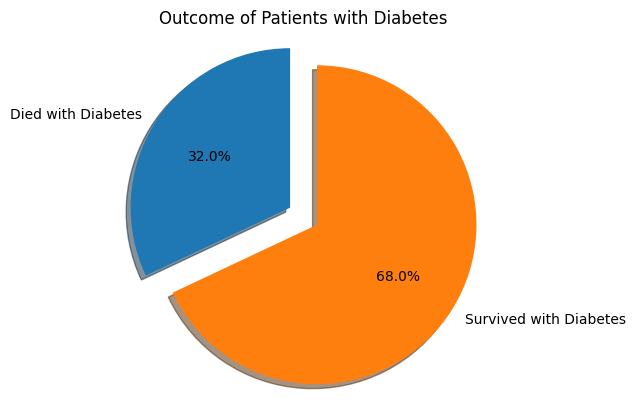

Total diabetic patients who died: 40
Total diabetic patients who survived: 85


In [14]:
# 🎯 Goal: Analyze how many patients with diabetes died vs survived

# ✅ Step 1: Filter patients who have diabetes (diabetes == 1)
diabetic_patients = data[data["diabetes"] == 1]

# ✅ Step 2: From those patients, filter based on DEATH_EVENT
# Patients who have diabetes and died
patient_have_diabetes_died = diabetic_patients[diabetic_patients["DEATH_EVENT"] == 1]

# Patients who have diabetes and survived
patient_have_diabetes_alive = diabetic_patients[diabetic_patients["DEATH_EVENT"] == 0]

# ✅ Step 3: Count both groups
len_d_died = len(patient_have_diabetes_died)
len_d_alive = len(patient_have_diabetes_alive)

# ✅ Step 4: Prepare pie chart data
arr2 = [len_d_died, len_d_alive]
labels = ['Died with Diabetes', 'Survived with Diabetes']

# ✅ Step 5: Plot the pie chart
plt.pie(
    arr2,
    labels=labels,
    explode=[0.2, 0.0],         # Highlight the 'Died' slice
    shadow=True,
    autopct='%1.1f%%',          # Show percentage with 1 decimal place
    startangle=90               # Start from top for consistency
)

plt.title("Outcome of Patients with Diabetes")
plt.axis('equal')               # Ensure pie chart is circular
plt.show()

# ✅ Step 6: Print raw counts
print("Total diabetic patients who died:", len_d_died)
print("Total diabetic patients who survived:", len_d_alive)

# 🧠 Inference:
# Most diabetic patients survived, but diabetes may still be a risk factor.
# We'll later see how significant it is when we analyze feature importance.


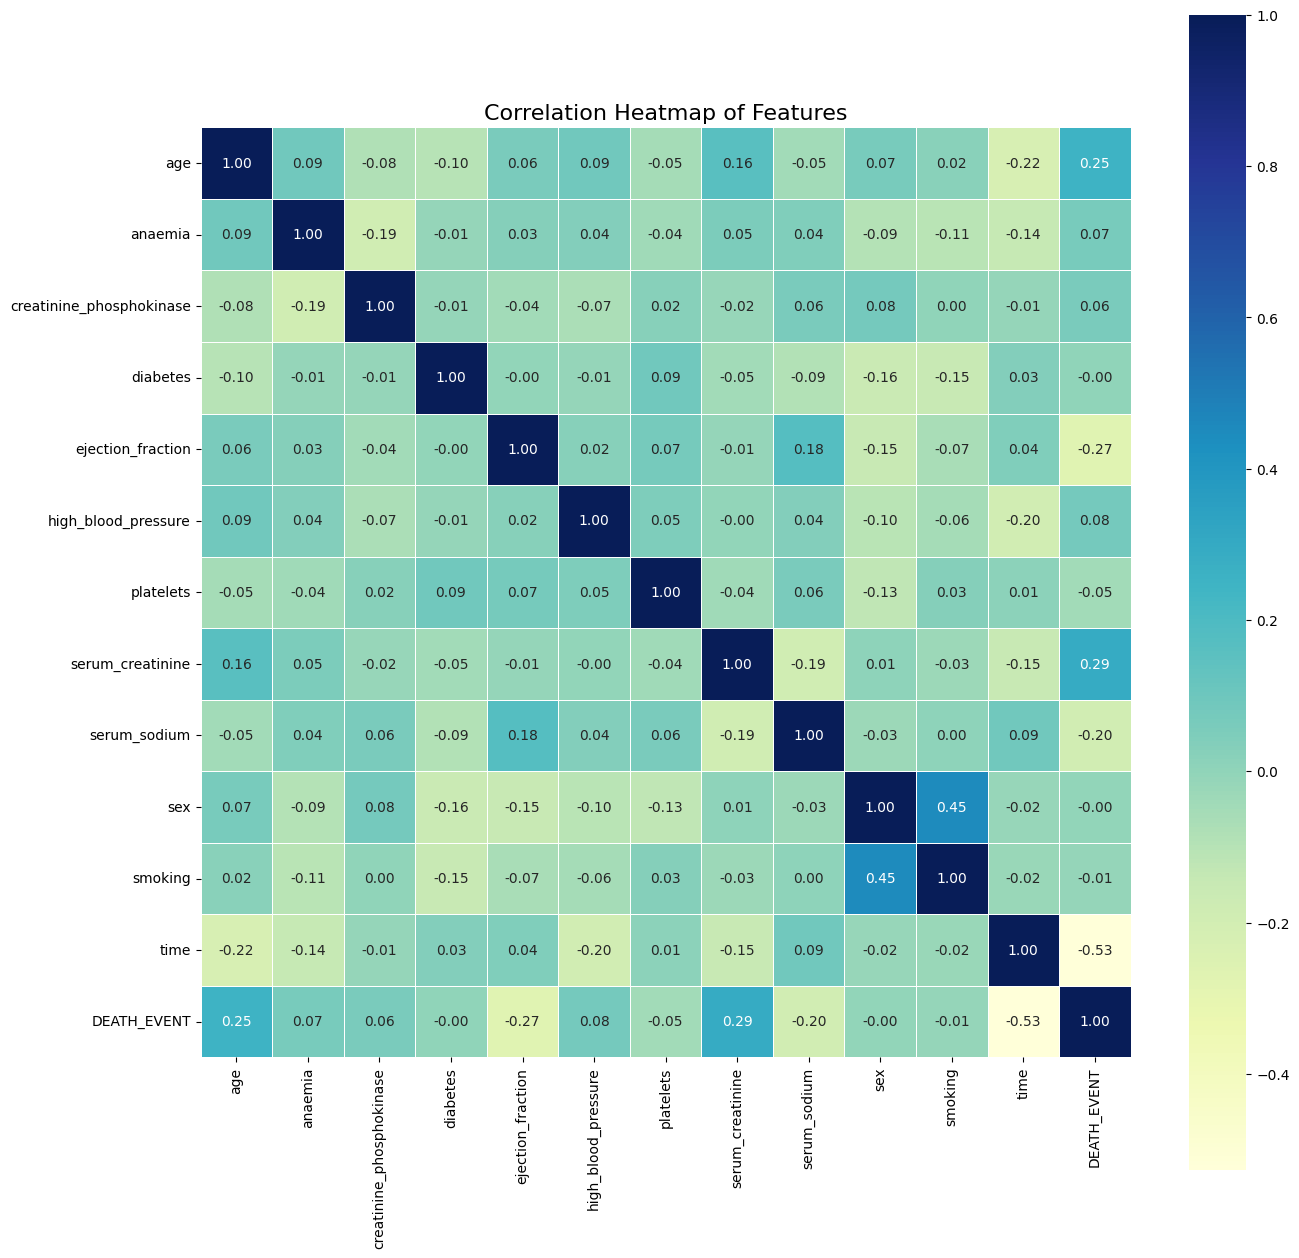

In [15]:
# 📊 Goal: Check how strongly features are correlated with each other and with the target (DEATH_EVENT)

# ✅ Step 1: Compute the correlation matrix
# This gives the Pearson correlation between all numerical columns
corr = data.corr()

# ✅ Step 2: Set up the figure size for the heatmap
# This ensures the heatmap is large enough to be readable
plt.figure(figsize=(15, 15))

# ✅ Step 3: Plot the heatmap
# - annot=True will write the correlation values in each cell
# - cmap="coolwarm" or "viridis" can be used for color customization
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', square=True, linewidths=0.5)

# ✅ Step 4: Set a title
plt.title("Correlation Heatmap of Features", fontsize=16)

# ✅ Step 5: Show the plot
plt.show()




corr

The correlation matrix (a DataFrame) passed as the heatmap input.
Computed using data.corr()

annot=True

Annotate each cell with its numeric value (correlation).
So you can see the exact values like 0.78, -0.23, etc.

fmt=".2f"

Format the annotation numbers to 2 decimal places.	0.783 → 0.78

cmap='YlGnBu'

Set the color map (gradient style).	Yellow → Green → Blue (YlGnBu)

square=True

Make each cell in the heatmap a square (not rectangular).
Helps maintain symmetry for visual clarity.

linewidths=0.5

Add lines between cells (set the line thickness).
Helps visually separate each box more clearly.

" \n - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. \n - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  \n - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  \n - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   \n - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.\n"

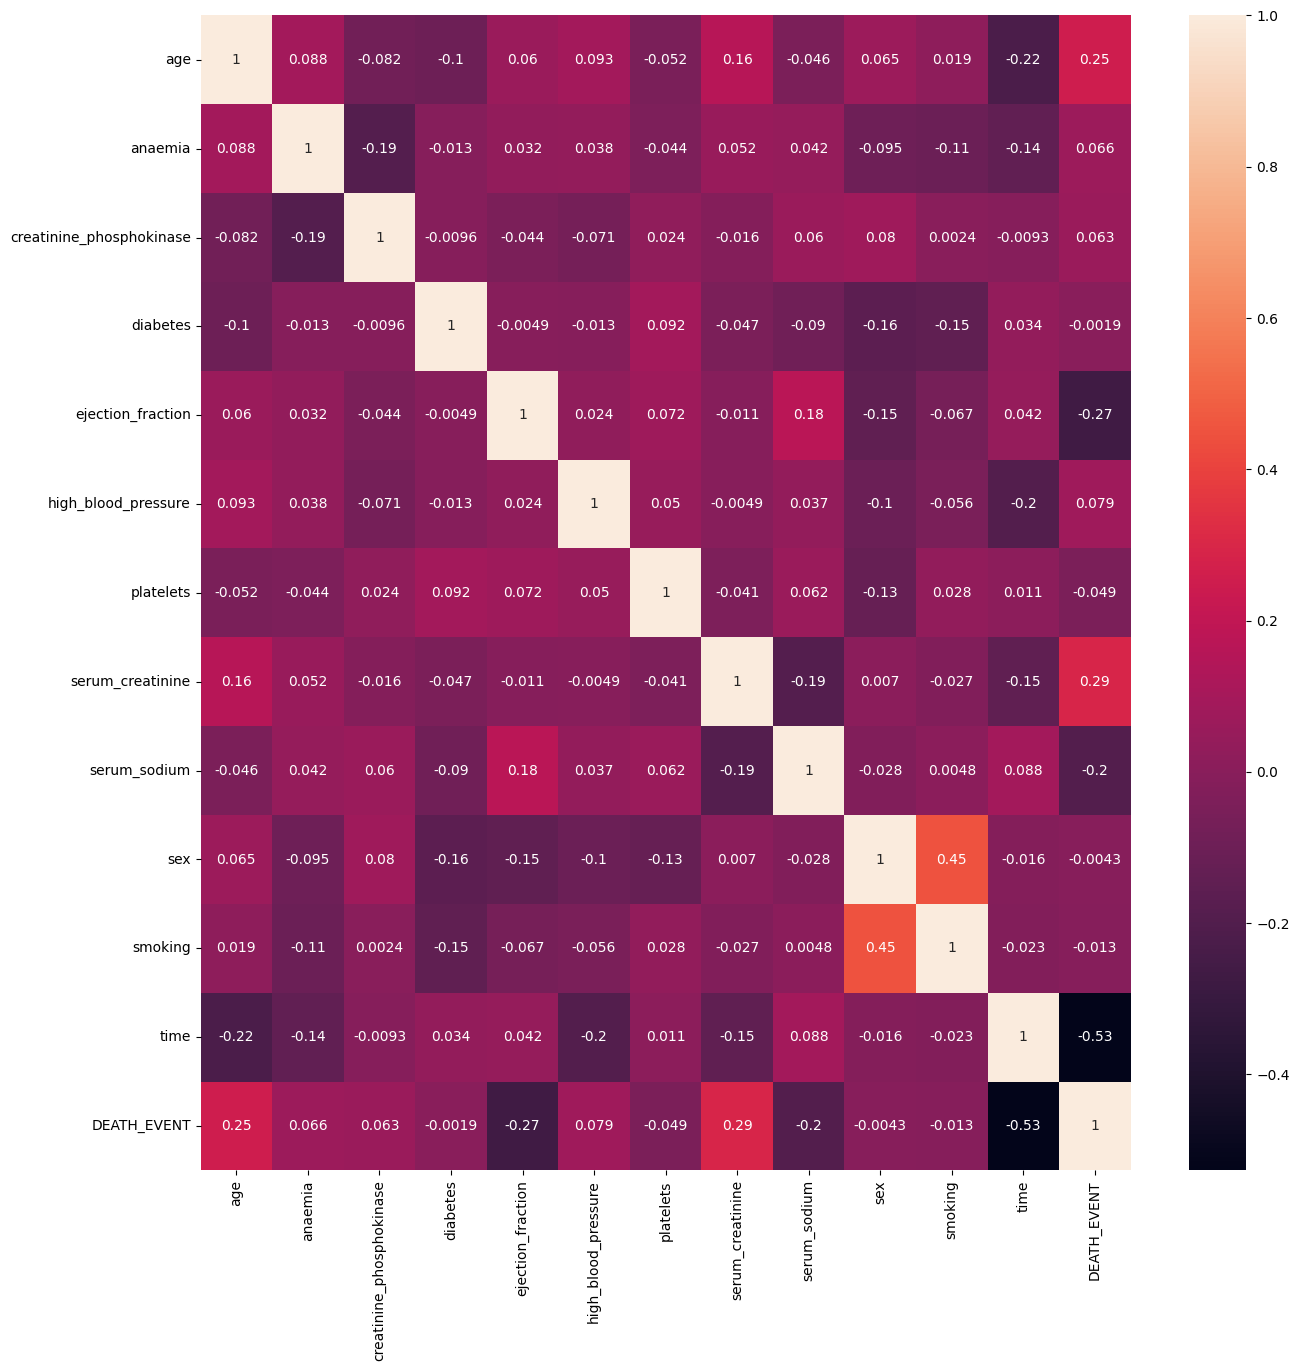

In [16]:
#or also we can use the below for analyzing the heatmap
# checking the Correlation of our variables

corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

# interpretation of correlation matrix

'''
 - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.
 - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
 - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.
 - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.
 - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
'''

# references:- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

data.corr()

Calculates the Pearson correlation matrix between all numerical features

.style

Accesses the Styler object in pandas for formatting

.background_gradient(cmap='coolwarm')

Adds a color gradient to each cell based on the correlation value using the "coolwarm" colormap



In [17]:
# 📊 Goal: Display the correlation matrix with a color gradient inside the notebook (no plot needed)

# Step 1: Compute the Pearson correlation matrix for all numeric features
correlation_matrix = data.corr()

# Step 2: Apply a background color gradient using Pandas Styler
# - 'coolwarm' colormap helps to highlight negative (blue) and positive (red) correlations
# - This is especially useful in Jupyter/Colab notebooks for quick insights
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316



# Dataset development📚

**Can we use y_train (the output) to train the model, even though it's the value we want to predict?”**

✅ Short Answer:

Yes — during training, we must use the output (y_train) because the model needs to learn what the correct answers are.

This is how supervised learning works.


X_train

Inputs (features) for training	Train model

y_train

Labels for training	Train model , basically we use output values also so model can learn by making patterns that how we get outputs on the given inputs

X_test

Inputs (features) for testing	Make predictions

y_test

Actual labels for test set	Compare predictions & evaluate modelb, here obiously we can use output values to check how close is our predicted value to the actual values

In [19]:
# 📦 Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# 🎯 Define features (X) and target label (y)
# X: All columns except 'DEATH_EVENT'
# y: Only the 'DEATH_EVENT' column (this is what we want to predict)
X = data.drop('DEATH_EVENT', axis=1)
y = data["DEATH_EVENT"]

# ✂️ Split the data into training and testing sets
# test_size=0.3 → 30% of the data is used for testing, 70% for training
# random_state=0 → Ensures consistent results every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 🖨️ Print the shape of each dataset to confirm the split worked correctly
print("Shape of the X_train:", X_train.shape)  # Rows and columns in training features
print("Shape of the y_train:", y_train.shape)  # Number of training labels
print("Shape of the X_test:", X_test.shape)    # Rows and columns in testing features
print("Shape of the y_test:", y_test.shape)    # Number of testing labels


Shape of the X_train: (209, 12)
Shape of the y_train: (209,)
Shape of the X_test: (90, 12)
Shape of the y_test: (90,)



# Feature Engineering 📚

Now, we will do feature engineering, we will add interaction terms, interaction terms are the product of two features, so below is the function prepared for interaction terms.

# ✅ What is Feature Engineering?

Feature engineering is the process of creating, transforming, or selecting features (input variables) to help your model learn better and make more accurate predictions.

# ✅ Why Create age × cholesterol?

Because some variables affect the outcome more strongly when combined than when they act alone.

# 🔍 Real-Life Intuition:
A young person with high cholesterol might not be at serious heart risk.

But an older person with the same high cholesterol is at much higher risk.

# So individually:

age → moderate effect

cholesterol → moderate effect

But together:

High age and high cholesterol = significantly higher risk
This combined risk is what interaction terms help capture.



In [20]:
# 🔧 This function adds new features by multiplying each pair of existing features
# These new features are called "interaction terms"
def add_interactions(X):
    # Get the list of all column names (feature names)
    features = X.columns

    # Count how many features are there
    m = len(features)

    # Make a deep copy of the original data to avoid changing it by mistake
    X_int = X.copy(deep=True)

    # Loop through each feature one by one
    for i in range(m):
        # Get the name of the i-th feature (like 'age', 'time', etc.)
        feature_i_name = features[i]

        # Get all the values of this feature (column data)
        feature_i_data = X[feature_i_name]

        # Now loop through the features that come after feature_i to create pairs
        for j in range(i+1, m):
            # Get the name and data of the j-th feature
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]

            # Create a new name for the interaction feature (e.g., 'age_x_time')
            feature_i_j_name = feature_i_name + "_x_" + feature_j_name

            # Multiply the values of the two features to create the new interaction feature
            X_int[feature_i_j_name] = feature_i_data * feature_j_data

    # Return the new dataset that now includes the original features + interaction terms
    return X_int



# Model Building 📚

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# ✅ Function to evaluate model predictions using various metrics
def evaluating_model(y_test, y_pred):
    '''
    This function prints common evaluation metrics for classification models:
    - Accuracy: How often the model is correct
    - Precision: Of all predicted positives, how many were actually positive
    - Recall: Of all actual positives, how many were correctly predicted
    - Confusion Matrix: Shows correct vs incorrect predictions in detail
    '''

    # 🎯 Accuracy: Total correct predictions / Total predictions
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))

    # 🎯 Precision: How precise the model is when it predicts "positive" (death)
    print("Precision Score: ", precision_score(y_test, y_pred))

    # 🎯 Recall: Out of all actual "death" cases, how many did the model correctly predict
    print("Recall Score: ", recall_score(y_test, y_pred))

    # 📊 Confusion Matrix: Breakdown of predicted vs actual values
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



In [25]:
# 📦 Importing the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# 🧠 Step 1: Creating the model object
# max_iter=1000 means the model will run up to 1000 times to find the best solution
lr_clf = LogisticRegression(max_iter=1000)

# 🚀 Step 2: Training the model on the training data (original features)
# The model will learn patterns from X_train to predict y_train
lr_clf.fit(X_train, y_train)

# 🔮 Step 3: Making predictions on the test data
# The model uses what it learned to predict DEATH_EVENT for unseen data
lr_clf_pred = lr_clf.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred = lr_clf.predict(X_test)  # Step 1: Make predictions on test data
evaluating_model(y_test, y_pred) # Step 2: Evaluate model performance

Accuracy Score:  0.8111111111111111
Precision Score:  0.8235294117647058
Recall Score:  0.5
Confusion Matrix:
 [[59  3]
 [14 14]]


# ✅ What Will Happen
This will:

Use the trained lr_clf logistic regression model to predict values for the test set.

Pass the true values y_test and the predicted values y_pred to your evaluating_model() function.

The function will print:

Accuracy

Precision

Recall

Confusion Matrix

In [29]:
# 📦 Importing necessary libraries from scikit-learn
from sklearn.pipeline import make_pipeline                 # Used to build a pipeline
from sklearn.preprocessing import StandardScaler           # Used to scale (standardize) the data
from sklearn.linear_model import LogisticRegression        # Logistic Regression model

# ✅ Step 1: Create a pipeline
# This pipeline will:
# - First scale the features (using StandardScaler)
# - Then train a logistic regression model
lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# ✅ Step 2: Fit (train) the pipeline using training data
# This means: scale the X_train data, then train the logistic regression model on that
lr_clf_pip.fit(X_train, y_train)

# ✅ Step 3: Use the trained pipeline to make predictions on test data
# This will automatically scale X_test and make predictions
y_pred1 = lr_clf_pip.predict(X_test)

# ✅ Step 4: Evaluate how well the model performed
# Using the evaluation function you defined earlier
evaluating_model(y_test, y_pred1)



Accuracy Score:  0.8111111111111111
Precision Score:  0.7894736842105263
Recall Score:  0.5357142857142857
Confusion Matrix:
 [[58  4]
 [13 15]]


# from sklearn.preprocessing import StandardScaler
**🧠 What does this line mean?**

You are importing a tool called StandardScaler from scikit-learn (a popular machine learning library).

This tool is used to scale your data, or in other words — standardize the values of your features.

💡 Simple Explanation:
Imagine you have a dataset with features like:

Feature     	Example Values

Age	    =       40, 50, 60

Serum Creatinine =	1.0, 2.5, 7.2

Time	= 10, 100, 200


All these features are on very different scales (like one is in years, one is in mg/dL, another is in days).

🎯 Why is this a problem?
Some machine learning models (like Logistic Regression or KNN) work better if all features are on the same scale.

Great! You're now training an SVM (Support Vector Machine) classifier using GridSearchCV, which is a smart way to automatically find the best hyperparameters for your model.

Let me explain each line in very simple language, and then I’ll give you the final corrected + commented code.

✅ What You Are Doing:
You’re:

Using SVM (Support Vector Classifier) from sklearn.svm.SVC

Trying out different combinations of model parameters (C, gamma, kernel)

Using GridSearchCV to search for the best combination

Fitting the model on your training data



Absolutely! Let's explain the SVM parameters C, gamma, and kernel in very simple, beginner-friendly language, with examples and analogies.

🧠 1. C → Penalty for Misclassification (How strict your model is)

✅ Think of C as:

"How much you care about being perfect on training data."

📦 Low C (e.g., C=0.1):
You allow some mistakes in training.

Your model is more relaxed and generalizes better.

It might not fit training data perfectly, but it avoids overfitting.

🔒 High C (e.g., C=1000):

You punish every error a lot.

The model tries to fit the training data very tightly.

It may overfit (too specific), and perform poorly on test data.

🎯 Analogy:

Imagine a teacher grading students:

Low C: Lenient teacher — allows a few mistakes.

High C: Strict teacher — every small mistake counts.


🧠 2. gamma →
 How far the influence of a training example goes

✅ Think of gamma as:

"How close other points must be to matter."

📦 High gamma (e.g., 1, 0.1):

Model looks very closely at nearby points.

Decision boundary becomes very wavy and tight.

Risk of overfitting.

📦 Low gamma (e.g., 0.001, 0.0001):

Model looks at points that are far away too.

Boundary is smoother and more general.

Better for noisy data.

🎯 Analogy:

Imagine dropping ink in water:

High gamma: Ink stays in one small spot (tight, local).

Low gamma: Ink spreads all around the water (global effect).

🧠 3. kernel → Type of Decision Boundary Shape

✅ Think of kernel as:

"What kind of line or curve you want the model to draw to separate classes."

Types of kernels:

'linear'
Draws a straight line	Data that is linearly separable

'rbf' (Radial Basis Function)

Draws complex curves	Most general, flexible (default)

'poly'

Fits polynomial curves	When data has a clear polynomial shape

'sigmoid'

Like a neural network	Rarely used

In [30]:
# 🧠 Step 1: Import necessary modules
from sklearn.svm import SVC                          # SVC = Support Vector Classifier (from SVM)
from sklearn.model_selection import GridSearchCV     # For trying many combinations of parameters automatically

# 🛠️ Step 2: Define the grid of parameters to test
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],                   # Test 5 values for C (model flexibility)
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],         # Test 5 values for gamma (how far influence goes)
    'kernel': ['rbf']                              # Use only the RBF kernel (good for nonlinear data)
}

# 🔍 Step 3: Set up GridSearchCV to test all combinations
# - SVC(): the model we're using
# - param_grid: the parameters to test
# - refit=True: after finding the best parameters, it will retrain the model on the full training set
# - verbose=3: show detailed output while training
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# 🚀 Step 4: Fit (train) the model on your training data
# This will:
# - Try 5 x 5 = 25 combinations of C and gamma
# - Use cross-validation to test each combination
# - Select the best model automatically
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
# ✅ Step 1: Create an SVC model with chosen parameters
# C = 10 → the model tries hard to avoid mistakes (more strict)
# gamma = 0.0001 → each data point has a wide influence (smoother decision boundary)
svc = SVC(C=10, gamma=0.0001)

# ✅ Step 2: Train (fit) the model using training data
# The model learns patterns in X_train to predict y_train (DEATH_EVENT)
svc.fit(X_train, y_train)

# ✅ Step 3: Make predictions on test data
# Now that the model is trained, use it to predict the labels for X_test
y_pred2 = svc.predict(X_test)

# ✅ Step 4: Evaluate the model's performance
# This will show Accuracy, Precision, Recall, and Confusion Matrix
evaluating_model(y_test, y_pred2)


Accuracy Score:  0.6777777777777778
Precision Score:  0.4
Recall Score:  0.07142857142857142
Confusion Matrix:
 [[59  3]
 [26  2]]


You're now moving to Decision Trees and using RandomizedSearchCV to tune hyperparameters — a great approach when you have a lot of options and want faster results than GridSearchCV.

Let’s go step by step to explain and comment your code clearly.

# ✅ What Your Code Does (Overview):

Defines a function randomized_search to run hyperparameter tuning on a DecisionTreeClassifier

Uses RandomizedSearchCV to try different combinations of parameters randomly (much faster than GridSearch)

Fits the best model to training data and tests it on test data

Returns the best decision tree

In [32]:
# 📦 Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# 🛠️ Define a function to do randomized search on Decision Tree
def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    # RandomizedSearchCV will randomly try 'runs' combinations of parameters
    rand_clf = RandomizedSearchCV(
        clf,                      # the classifier to tune
        params,                   # the dictionary of parameters to try
        n_iter=runs,              # how many random combinations to try
        cv=5,                     # 5-fold cross-validation
        n_jobs=-1,                # use all CPU cores
        random_state=2            # for reproducibility
    )

    # 🔍 Train the model using training data and parameter combinations
    rand_clf.fit(X_train, y_train)

    # 🎯 Get the best model from search
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_  # mean training CV accuracy for the best model

    print("✅ Training score (cross-validation): {:.3f}".format(best_score))

    # 📊 Evaluate the best model on test data
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('🧪 Test score (accuracy on X_test): {:.3f}'.format(accuracy))

    return best_model

# 📌 Now run the function with a set of parameters to search from
randomized_search(params={
    'criterion': ['entropy', 'gini'],                   # splitting rule
    'splitter': ['random', 'best'],                     # how the split is chosen
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10],         # minimum samples to split
    'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],     # minimum samples at leaf
    'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],  # minimum gain to make a split
    'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],          # limit on total leaf nodes
    'max_features': ['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],          # number of features used
    'max_depth': [None, 2, 4, 6, 8],                                       # depth of tree
})


✅ Training score (cross-validation): 0.847
🧪 Test score (accuracy on X_test): 0.756


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

Let’s break it down simply:

**why we choose those specific parameters for a Decision Tree, and what effect they have.**

🌳 We tune Decision Tree parameters to:
Control overfitting or underfitting

Make the tree generalize well on unseen data

Balance performance and complexity

**🎛️ Parameters You Used & Why They Matter:**


**criterion**

How the tree decides where to split

'gini', 'entropy'

Measures impurity/information gain — affects how pure each split is

**splitter**

How the split is chosen
'best', 'random'

'best' = best split chosen,

'random' = randomly chosen split

**min_samples_split	**

Minimum samples to split a node

[2, 3, 4, 5, ...]

Controls how sensitive the tree is to splitting — larger = less likely to overfit

**min_samples_leaf**

Minimum samples at a leaf node

[1, 0.01, 0.02, ...]

Prevents very small leaves — useful to avoid noise

**min_weight_fraction_leaf**

Like min_samples_leaf but uses fraction

[0.0, 0.005, 0.01, ...]

Ensures every leaf has at least X% of the data

**min_impurity_decrease	**

Minimum impurity gain needed to split

[0.0, 0.0005, 0.005, 0.05, ...]

Helps stop unnecessary splits (like regularization)

**max_depth	**

Limits how deep the tree can grow

[None, 2, 4, 6, 8]

Controls overfitting (deep = more complex)

**max_leaf_nodes**

Max number of end nodes (leaves)

[10, 20, ..., None]

Forces the tree to simplify itself

**max_features	**

How many features to consider when splitting

['auto', 0.9, 0.8, ...]

Makes the tree consider fewer features (adds randomness, improves generalization)

In [33]:
# 📦 Import the classifier
from sklearn.tree import DecisionTreeClassifier

# 🌳 Step 1: Create a Decision Tree model with specific hyperparameters
ds_clf = DecisionTreeClassifier(
    max_depth=8,                    # Limit the tree depth to 8 levels (avoids overfitting)
    max_features=0.9,              # At each split, use 90% of the total features randomly
    max_leaf_nodes=30,            # Maximum number of final leaf nodes allowed
    min_impurity_decrease=0.05,   # A node will only split if it reduces impurity by at least 0.05
    min_samples_leaf=0.02,        # Minimum 2% of total samples must be at each leaf (avoids tiny leaves)
    min_samples_split=10,         # A node must have at least 10 samples to consider splitting
    min_weight_fraction_leaf=0.005, # Similar to min_samples_leaf but as fraction (0.5% of all data)
    random_state=2,               # For reproducible results
    splitter='random'             # Randomly chooses split instead of best (adds some randomness)
)

# 🧠 Step 2: Train the model on the training data
ds_clf.fit(X_train, y_train)

# 🔮 Step 3: Use the trained model to make predictions on test data
pred4 = ds_clf.predict(X_test)

# 📊 Step 4: Evaluate how well the model performed
evaluating_model(y_test, pred4)


Accuracy Score:  0.8111111111111111
Precision Score:  0.72
Recall Score:  0.6428571428571429
Confusion Matrix:
 [[55  7]
 [10 18]]


Awesome! 🎯 You’re now tuning a Random Forest Classifier, which is an ensemble of many Decision Trees working together to give better accuracy and robustness than a single tree. Let’s walk through your code step by step in simple, easy-to-understand language.

✅ What You’re Doing:

You are using the randomized_search() function (which you defined earlier) to tune the hyperparameters of a RandomForestClassifier, just like you did for the Decision Tree.



In [34]:
from sklearn.ensemble import RandomForestClassifier

# 🔍 Tune hyperparameters using RandomizedSearchCV
randomized_search(
    params={
        # Minimum number of samples that must be at a leaf node
        'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],

        # Minimum impurity decrease required to make a split
        'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],

        # Number of features to consider when looking for the best split
        'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],

        # Maximum depth of the individual trees
        'max_depth': [None, 2, 4, 6, 8, 10, 20],
    },

    # 🧠 Use RandomForestClassifier as the model to be tuned
    clf=RandomForestClassifier(random_state=2)
)


✅ Training score (cross-validation): 0.847
🧪 Test score (accuracy on X_test): 0.867


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

Perfect! You’ve now manually created and evaluated a Random Forest model with your own selected hyperparameters. Let’s walk through your code step by step and explain what each part means in simple, easy language, so you understand exactly what you’re doing.

In [35]:
# 🌲 Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# 📦 Step 1: Create a Random Forest model with your chosen settings
rf_clf = RandomForestClassifier(
    max_depth=2,                   # The trees can grow only 2 levels deep → simple model, prevents overfitting
    max_features=0.5,              # Each tree considers only 50% of the features at each split → adds randomness
    min_impurity_decrease=0.01,    # A node will split only if it reduces impurity by at least 0.01 → avoids weak splits
    min_samples_leaf=10,           # Each leaf node must have at least 10 samples → prevents overfitting to small details
    random_state=2                 # Ensures consistent results every time you run the code
)

# 🧠 Step 2: Train the model using the training data
rf_clf.fit(X_train, y_train)

# 🔮 Step 3: Use the trained model to make predictions on the test data
pred5 = rf_clf.predict(X_test)

# 📊 Step 4: Evaluate how well the model performs
evaluating_model(y_test, pred5)


Accuracy Score:  0.8666666666666667
Precision Score:  0.9
Recall Score:  0.6428571428571429
Confusion Matrix:
 [[60  2]
 [10 18]]


Great! You’re now training an XGBoost Classifier, which is one of the most powerful and widely-used models in machine learning competitions and production systems. 🔥

💥 What Is XGBoost?
XGBoost stands for Extreme Gradient Boosting.

It’s a powerful and optimized machine learning algorithm based on decision trees and boosting.

🚀 In Simple Terms:
XGBoost is like a team of decision trees working together, where:

Each new tree learns from the mistakes of the previous trees.

The final prediction is made by combining the strengths of all the trees.

It’s smarter, faster, and more accurate than traditional models in many situations.

In [42]:
# 📦 Import XGBoost and evaluation metrics
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 🔄 Step 1: Convert datasets into DMatrix format (XGBoost's preferred format)
# DMatrix is optimized for both training speed and memory usage
dtrain = xgb.DMatrix(X_train, label=y_train)  # Training data
dtest = xgb.DMatrix(X_test, label=y_test)     # Testing data

# ⚙️ Step 2: Define parameters for training the XGBoost model
params = {
    'max_depth': 4,                    # Limit tree depth to prevent overfitting
    'eta': 0.1,                        # Step size shrinkage (same as learning_rate)
    'objective': 'binary:logistic',   # Binary classification problem
    'eval_metric': 'logloss',         # Loss function to monitor during training
    'subsample': 1.0,                 # Use all rows (no row sampling)
    'colsample_bytree': 1.0           # Use all features (no column sampling)
}

# 👁️‍🗨️ Step 3: Create a watchlist to track training and evaluation performance
evals = [(dtrain, 'train'), (dtest, 'eval')]

# 🚀 Step 4: Train the model
xgb_model = xgb.train(
    params=params,              # Training parameters
    dtrain=dtrain,              # Training data
    num_boost_round=400,        # Max number of boosting rounds (trees)
    evals=evals,                # Datasets to evaluate during training
    early_stopping_rounds=10,   # Stop if eval metric doesn't improve for 10 rounds
    verbose_eval=True           # Print log at each boosting round
)

# 🔮 Step 5: Predict the probability of class "1" (death event) for each test sample
y_pred_probs = xgb_model.predict(dtest)

# 📤 Step 6: Convert probabilities to class labels (0 or 1) using a threshold of 0.5
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# 📊 Step 7: Define a function to evaluate model performance
def evaluating_model(y_test, y_pred):
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ✅ Step 8: Call the evaluation function
evaluating_model(y_test, y_pred)



[0]	train-logloss:0.58243	eval-logloss:0.57444
[1]	train-logloss:0.54278	eval-logloss:0.53675
[2]	train-logloss:0.50968	eval-logloss:0.50777
[3]	train-logloss:0.47639	eval-logloss:0.48659
[4]	train-logloss:0.44921	eval-logloss:0.46540
[5]	train-logloss:0.42418	eval-logloss:0.45034
[6]	train-logloss:0.40343	eval-logloss:0.43492
[7]	train-logloss:0.38172	eval-logloss:0.42562
[8]	train-logloss:0.36346	eval-logloss:0.41523
[9]	train-logloss:0.34804	eval-logloss:0.40096
[10]	train-logloss:0.33191	eval-logloss:0.39540
[11]	train-logloss:0.31713	eval-logloss:0.38980
[12]	train-logloss:0.30591	eval-logloss:0.38287
[13]	train-logloss:0.29358	eval-logloss:0.37953
[14]	train-logloss:0.28256	eval-logloss:0.37523
[15]	train-logloss:0.27274	eval-logloss:0.37315
[16]	train-logloss:0.26280	eval-logloss:0.37093
[17]	train-logloss:0.25471	eval-logloss:0.36779
[18]	train-logloss:0.24481	eval-logloss:0.36587
[19]	train-logloss:0.23749	eval-logloss:0.36552
[20]	train-logloss:0.22969	eval-logloss:0.36157
[2

Great — you're now trying to visualize feature importance using XGBoost, which is a very useful step to understand which features are driving your predictio

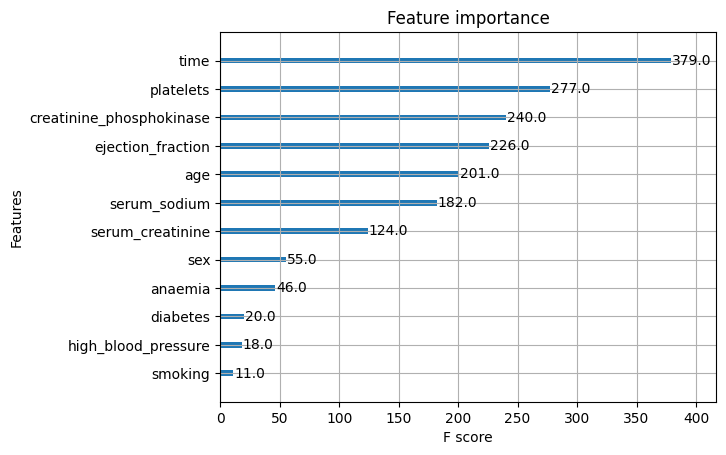

In [50]:
from xgboost import plot_importance
# xgb.feature_importances_
plot_importance(xgb1)
plt.show()


Yes ✅, the result in your screenshot is correct and meaningful. That’s a standard feature importance plot from XGBoost, using the importance_type='weight' by default.

📌 What is F Score in XGBoost?
The F score (or frequency score) shown here refers to:

The number of times a feature is used to split the data across all the trees in the model.

📊 In Simple Terms:
"time" = 379 → This feature was chosen 379 times by XGBoost for splitting nodes in decision trees.

"platelets" = 277 → Platelet levels were used in 277 splits.

"smoking" = 11 → Smoking was rarely used — only 11 times.

So, higher F-score → more useful the feature was for the model to make decisions.



Great! You're now using Gradient Boosting, another powerful tree-based model. Here's your code with clear explanations and comments to help you understand what each part does:

In [51]:
from sklearn.ensemble import GradientBoostingClassifier  # 🌲 Import GBDT from sklearn

# 🎯 Step 1: Initialize the model
# - n_estimators = 200 ➝ Use 200 trees in the ensemble
# - learning_rate = 0.1 ➝ Shrinks the contribution of each tree (controls overfitting)
# - max_depth = 1 ➝ Each tree will be a very shallow decision stump (simpler trees)
# - random_state = 0 ➝ Ensures reproducibility
gbdt = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=1,
    random_state=0
)

# 🚀 Step 2: Train the model using the training data
gbdt.fit(X_train, y_train)

# 🔮 Step 3: Predict the target values for the test set
pred_gdbt = gbdt.predict(X_test)

# 📊 Step 4: Evaluate the model’s performance using the evaluation function
evaluating_model(y_test, pred_gdbt)


Accuracy Score:  0.8555555555555555
Precision Score:  0.8571428571428571
Recall Score:  0.6428571428571429
Confusion Matrix:
 [[59  3]
 [10 18]]



# Choosing the best model and saving them

In [54]:
# we will choose XGboost

import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl' )
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])